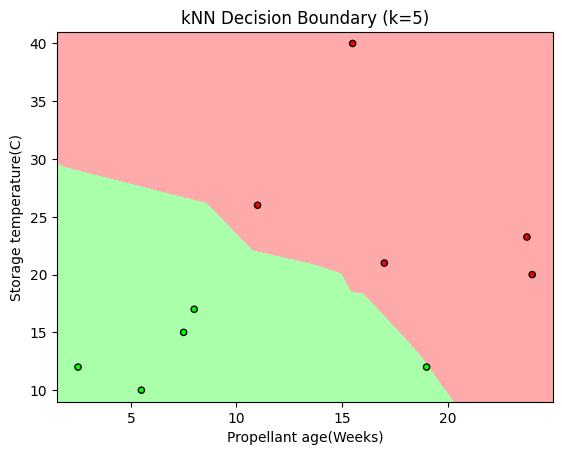

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# function for plotting
def plot_decision_boundary(model, X, y, n_neighbors):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = .02  # Step size in the mesh

    # Creating a meshgrid 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the result to create a grid of predictions
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    


    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN Decision Boundary (k={n_neighbors})")
    plt.xlabel('Propellant age(Weeks)')
    plt.ylabel('Storage temperature(C)')
    plt.show()

# Random data generation
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)
X=np.array([[15.5, 40], [23.75, 23.25],[8, 17],[17, 21],[5.5, 10],[19, 12],[24, 20],[2.5, 12],[7.5, 15],[11, 26]])
y=[0,0,1,0,1,1,0,1,1,0]
# KNN model

#print(y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
# Plotting decision boundary
plot_decision_boundary(knn, X, y, n_neighbors=5)


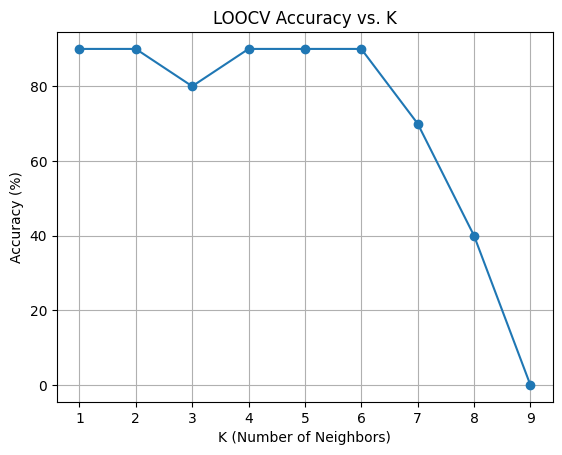

In [46]:
loo = LeaveOneOut()
k_values = range(1, len(X))
accuracy_scores = []

for k in k_values:
    correct_predictions = 0
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predicted_class = knn.predict(X_test)
        
        if predicted_class[0] == y_test[0]:
            correct_predictions += 1
    
    accuracy = correct_predictions*100 / len(X)
    accuracy_scores.append(accuracy)

# Plotting accuracy vs. k
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("LOOCV Accuracy vs. K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.grid()
plt.show()

In [47]:
optimum_k = k_values[np.argmax(accuracy_scores)]
print("Optimum k value:", optimum_k)

Optimum k value: 1
